# Exploratory Data Analysis

In this notebook, we will explore relationships between several NFL passing statistics and QB win percentage and the several College Passing Statistics and the NFL passing statistics that are deemed significant.

# Loading Modules

In [298]:
import pandas as pd
import numpy as np
import re
import statistics
import seaborn as sns
import math
from scipy import stats
import glob
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
import matplotlib.pyplot as plt

# Loading the Data

In [299]:
#Define necessary paths
path = '../../capstone_project_1/data/'

In [300]:
#load data into DataFrames
nfl_season = pd.read_csv(path + 'nfl.csv')
nfl_avg = pd.read_csv(path + 'nfl-passing.csv')
college = pd.read_csv(path + 'college-passing.csv')
qbs = pd.read_csv(path + 'qbs-09-19.csv')

In [301]:
nfl_season = nfl_season.set_index('Player')

In [302]:
nfl_avg = nfl_avg.rename(columns={'Unnamed: 0': 'Player'})
nfl_avg = nfl_avg.set_index('Player')

In [303]:
college = college.set_index('Player')

In [304]:
qbs = qbs.set_index('Player')
qbs = qbs.drop(['Unnamed: 0'], axis = 1)

In [305]:
qbs['Y/G_College'] = qbs['Yds_College'] / qbs['G_College']
qbs

,ANY/A,AY/A_NFL,Att_NFL,Cmp_NFL,Cmp%,G_NFL,Int_NFL,Int%,NY/A,QBR,...,Pct,Rate_College,TD_College,Y/A_College,YPC,Yds_College,rush_Att,rush_TD,rush_Yds,Y/G_College
Player,,,,,,,,,,,,,,,,,,,,,
A.J. McCarron,6.3,7.4,119.0,79.0,66.4,7,2,1.7,6.0,46.534351,...,67.1,163.3,74,8.8,-0.4,8630,113,3,-40,215.750000
Andrew Luck,6.3,7.0,548.3,333.3,60.4,86,83,2.6,6.4,63.100000,...,66.1,161.1,82,8.9,5.7,9430,163,7,957,248.157895
Andy Dalton,6.1,6.9,510.5,316.4,62.1,122,107,2.6,6.4,50.200000,...,63.8,159.2,50,8.8,4.8,5613,202,9,947,215.884615
Austin Davis,5.3,6.5,284.0,180.0,63.4,10,9,3.2,5.8,44.200000,...,61.6,136.1,50,7.2,3.2,6599,255,14,804,244.407407
Baker Mayfield,6.0,6.8,510.0,313.5,61.6,30,35,3.4,6.6,52.400000,...,69.8,189.5,119,10.7,2.8,12292,316,18,893,307.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tim Tebow,4.8,6.3,271.0,126.0,46.5,14,6,2.2,5.0,39.600000,...,67.8,164.2,21,9.2,4.2,2895,217,14,910,206.785714
Tom Savage,4.4,5.6,223.0,125.0,56.1,8,6,2.7,5.1,37.200000,...,56.8,133.4,35,7.7,-2.2,5169,135,4,-313,206.760000
Trevor Siemian,5.2,6.1,417.5,247.5,59.2,25,24,3.0,5.8,40.800000,...,58.9,116.0,24,6.3,0.4,5675,137,6,-42,157.638889


# Bivariate Analysis NFL Data, Select Target Based on Correlation to Win Pct and College Data.

In [306]:
#Correlation Matrix of 10 year NFL averages with Win Pct
nfl_avg_corr = nfl_avg.corr()
nfl_avg_corr = nfl_avg_corr[['win_pct','ANY/A', 'AY/A', 'Att', 'Cmp', 'Cmp%', 'G', 'Int', 'Int%', 'NY/A',
       'QBR', 'Rate', 'Sk', 'Sk%', 'TD', 'TD%', 'Y/A', 'Y/C', 'Y/G', 'Yds']]
nfl_avg_corr = nfl_avg_corr.sort_values(by=['win_pct'], ascending = False)
nfl_corr_styler = nfl_avg_corr.style.set_properties(**{'background-color': 'lawngreen',
                           'color': 'black',
                           'border-color': 'white'}, subset=['win_pct'])

In [307]:
nfl_corr_styler

,win_pct,ANY/A,AY/A,Att,Cmp,Cmp%,G,Int,Int%,NY/A,QBR,Rate,Sk,Sk%,TD,TD%,Y/A,Y/C,Y/G,Yds
win_pct,1,0.717887,0.721975,0.558721,0.591516,0.553458,0.475152,0.393053,-0.498858,0.641939,0.668838,0.72948,0.449958,-0.299554,0.486661,0.685187,0.635708,0.352533,0.49731,0.473782
Rate,0.72948,0.957923,0.966424,0.611327,0.674949,0.824149,0.537143,0.424973,-0.737903,0.832198,0.859048,1,0.525867,-0.359911,0.573657,0.845472,0.836955,0.36593,0.711027,0.553345
AY/A,0.721975,0.979146,1,0.582016,0.631123,0.68964,0.511756,0.408452,-0.727914,0.878157,0.837209,0.966424,0.504164,-0.327902,0.542727,0.819932,0.906437,0.575722,0.708356,0.526276
ANY/A,0.717887,1,0.979146,0.60082,0.651128,0.697266,0.534692,0.444285,-0.701942,0.9244,0.866928,0.957923,0.50131,-0.504452,0.570191,0.834983,0.886308,0.536158,0.753441,0.55385
TD%,0.685187,0.834983,0.819932,0.585199,0.634486,0.641569,0.526696,0.460401,-0.382411,0.813483,0.815476,0.845472,0.504235,-0.408026,0.586511,1,0.795863,0.473431,0.686664,0.545564
QBR,0.668838,0.866928,0.837209,0.628228,0.678546,0.683582,0.553965,0.472502,-0.554861,0.810396,1,0.859048,0.518276,-0.482385,0.590812,0.815476,0.758029,0.385016,0.672483,0.571045
NY/A,0.641939,0.9244,0.878157,0.557185,0.607634,0.654821,0.50437,0.470552,-0.396281,1,0.810396,0.832198,0.453293,-0.587499,0.54739,0.813483,0.940923,0.639489,0.796111,0.53335
Y/A,0.635708,0.886308,0.906437,0.516123,0.566911,0.646274,0.458666,0.410886,-0.391983,0.940923,0.758029,0.836955,0.448952,-0.291257,0.497977,0.795863,1,0.730198,0.738704,0.483438
Cmp,0.591516,0.651128,0.631123,0.99201,1,0.605277,0.718379,0.69023,-0.412247,0.607634,0.678546,0.674949,0.701317,-0.383607,0.732629,0.634486,0.566911,0.193425,0.80349,0.739062
Att,0.558721,0.60082,0.582016,1,0.99201,0.514529,0.70144,0.685365,-0.388338,0.557185,0.628228,0.611327,0.689792,-0.364238,0.70479,0.585199,0.516123,0.207031,0.774022,0.71637


## Define new DataFrame to include rate-based metrics that have moderate or strong correlation to NFL Win Pct ( >= 0.5 ).

In [308]:
#list comprehension to obtain significant metrics
columns = [row for row in nfl_avg_corr.index if (nfl_avg_corr[row]['win_pct'] >= 0.5)]

#define new dataframe 
nfl_avg = nfl_avg[columns]

#get rid of raw metrics that had moderate correlation -- Cmp & Att
nfl_avg = nfl_avg.drop(['Cmp','Att'], axis=1)

In [309]:
#Resulting DataFrame with significant Metrics
nfl_avg

,win_pct,Rate,AY/A,ANY/A,TD%,QBR,NY/A,Y/A,Cmp%
Player,,,,,,,,,
A.J. McCarron,0.666667,97.1,7.4,6.3,5.0,NaN,6.0,7.2,66.4
Aaron Rodgers,0.681529,103.6,8.4,7.4,6.2,67.6,6.8,7.8,64.9
Alex Smith,0.638462,91.8,7.1,6.2,4.3,54.3,6.2,7.1,64.0
Andrew Luck,0.616279,88.3,7.0,6.3,5.2,63.1,6.4,7.1,60.4
Andy Dalton,0.541667,87.9,6.9,6.1,4.5,50.2,6.4,7.1,62.1
...,...,...,...,...,...,...,...,...,...
Troy Smith,0.500000,77.8,7.6,6.0,3.4,38.5,6.5,8.1,50.3
Tyler Palko,0.250000,59.8,3.9,3.0,1.5,29.6,4.9,5.9,59.7
Tyrod Taylor,0.517241,89.4,7.0,5.9,3.6,60.7,5.7,6.8,62.2


## Heatmap Correlation Matrix of Significant Metrics

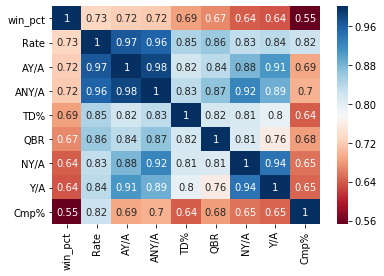

In [310]:
nfl_corr_new = nfl_avg.corr()
sns.heatmap(nfl_corr_new, xticklabels=nfl_corr_new.columns, yticklabels=nfl_corr_new.columns,cmap='RdBu', annot=True)

As seen from the correlation matrix above and and in the heatmap, there are 9 metrics that have a moderate to strong correlation with NFL Win Percentage. The target will be chosen from Passer rating, AY/A, ANY/A, TD%, QBR, NY/A, Y/A, Cmp%.  

# Scatter plots Win Pct vs NFL Stats, NFL Stats Distribution

Text(0.5, 1.0, 'Win_pct vs Rate')

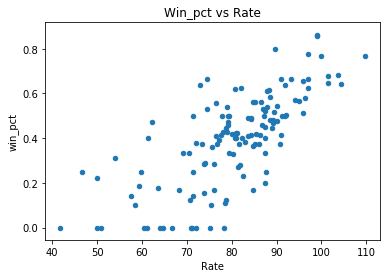

In [311]:
#Win Pct vs Passer Rating, min 100 attempts
rate = nfl_avg[['win_pct','Rate']]
rate.plot(x='Rate', y='win_pct',kind='scatter')
plt.title('Win_pct vs Rate')

Text(0.5, 1.0, 'Win_pct vs AY/A')

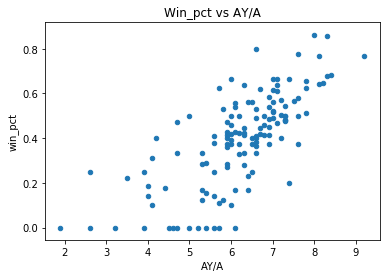

In [312]:
#Win Pct vs AY/A, min 100 attempts
aya = nfl_avg[['win_pct','AY/A']]
aya.plot(x='AY/A', y='win_pct',kind='scatter')
plt.title('Win_pct vs AY/A')

In [313]:
nfl_avg.columns

Index(['win_pct', 'Rate', 'AY/A', 'ANY/A', 'TD%', 'QBR', 'NY/A', 'Y/A',
       'Cmp%'],
      dtype='object')

Text(0.5, 1.0, 'Win_pct vs ANY/A')

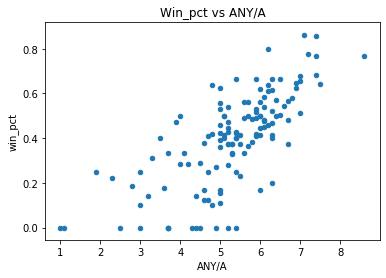

In [314]:
#Win Pct vs ANY/A, min 100 attempts
anya = nfl_avg[['win_pct','ANY/A']]
anya.plot(x='ANY/A', y='win_pct',kind='scatter')
plt.title('Win_pct vs ANY/A')

Text(0.5, 1.0, 'Win_pct vs TD%')

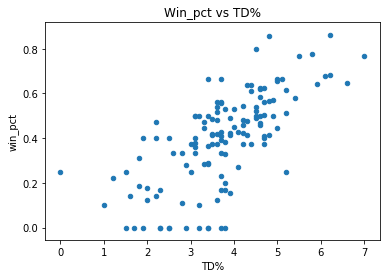

In [315]:
#Win Pct vs TD%, min 100 attempts
td = nfl_avg[['win_pct','TD%']]
td.plot(x='TD%', y='win_pct',kind='scatter')
plt.title('Win_pct vs TD%')

Text(0.5, 1.0, 'Win_pct vs QBR')

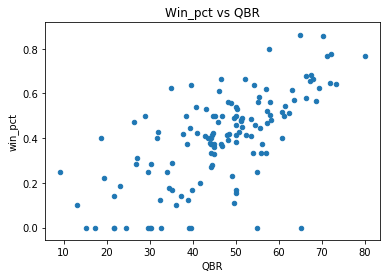

In [316]:
#Win Pct vs QBR, min 100 attempts
qbr = nfl_avg[['win_pct','QBR']]
qbr.plot(x='QBR', y='win_pct',kind='scatter')
plt.title('Win_pct vs QBR')

Text(0.5, 1.0, 'Win_pct vs NY/A')

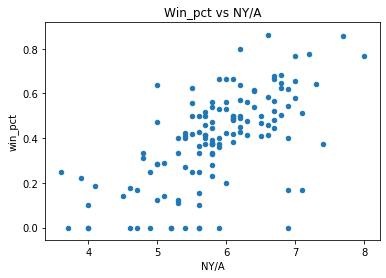

In [317]:
#Win Pct vs NY/A, min 100 attempts
nya = nfl_avg[['win_pct','NY/A']]
nya.plot(x='NY/A', y='win_pct',kind='scatter')
plt.title('Win_pct vs NY/A')

Text(0.5, 1.0, 'Win_pct vs Y/A')

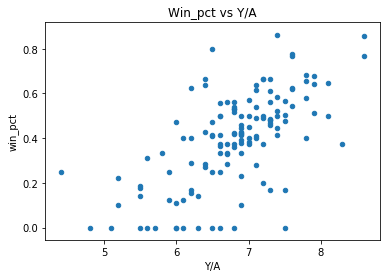

In [318]:
#Win Pct vs Y/A, min 100 attempts
ypa = nfl_avg[['win_pct','Y/A']]
ypa.plot(x='Y/A', y='win_pct',kind='scatter')
plt.title('Win_pct vs Y/A')

Text(0.5, 1.0, 'Win_pct vs Cmp%')

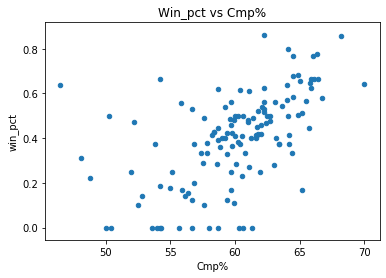

In [319]:
#Win Pct vs Cmp%, min 100 attempts
cmp = nfl_avg[['win_pct','Cmp%']]
cmp.plot(x='Cmp%', y='win_pct',kind='scatter')
plt.title('Win_pct vs Cmp%')

# Correlation Matrices of 8 Targets and College Stats.

Starting with strongest correlation to Win Pct, Passer Rating.

Text(0.5, 1, 'Correlation Matrix of Passer Rating w/ College Stats')

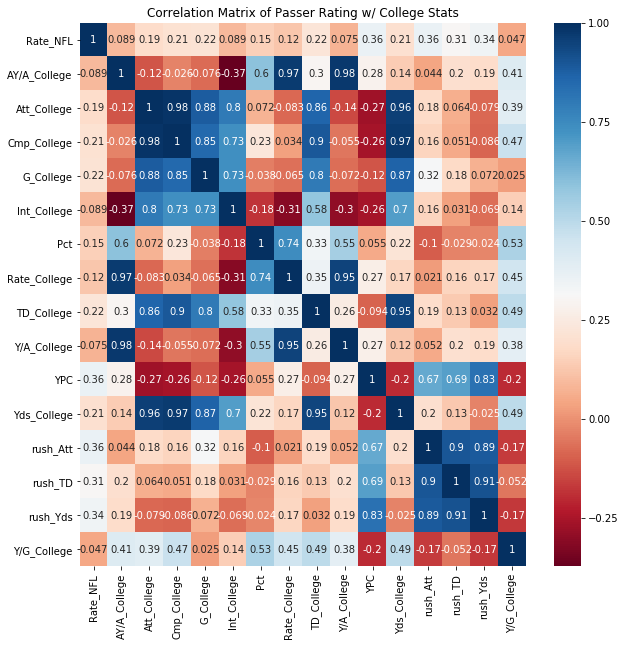

In [320]:
#Passer Rating
rate_w_college = qbs[['Rate_NFL','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
rate_w_college_corr = rate_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(rate_w_college_corr, xticklabels=rate_w_college_corr.columns, yticklabels=rate_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of Passer Rating w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of AY/A w/ College Stats')

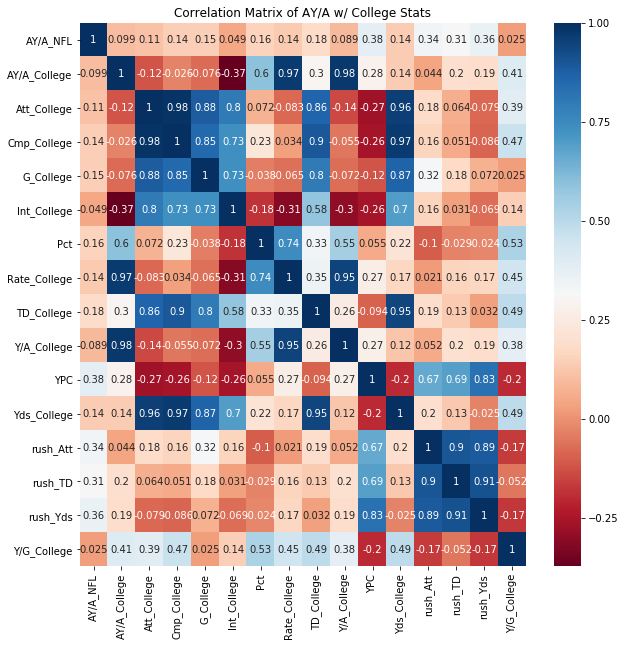

In [322]:
#Passer Rating
aya_w_college = qbs[['AY/A_NFL','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
aya_w_college_corr = aya_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(aya_w_college_corr, xticklabels=aya_w_college_corr.columns, yticklabels=aya_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of AY/A w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of AY/A w/ College Stats')

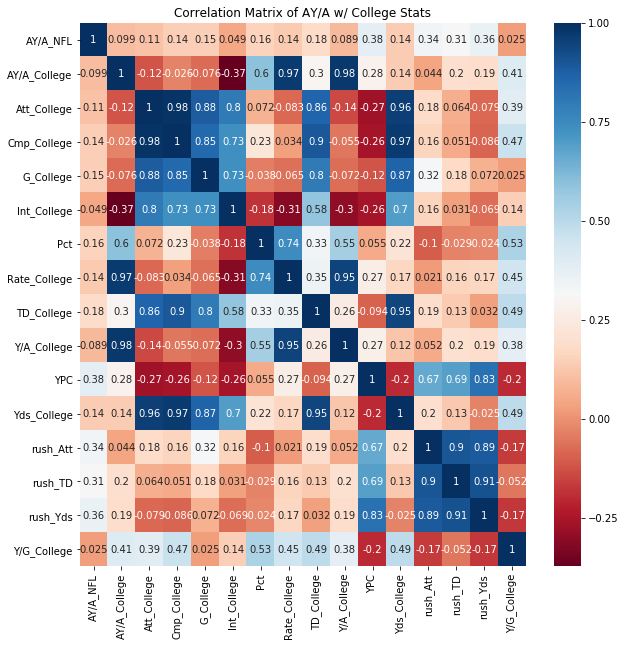

In [323]:
#AY/A
aya_w_college = qbs[['AY/A_NFL','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
aya_w_college_corr = aya_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(aya_w_college_corr, xticklabels=aya_w_college_corr.columns, yticklabels=aya_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of AY/A w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of ANY/A w/ College Stats')

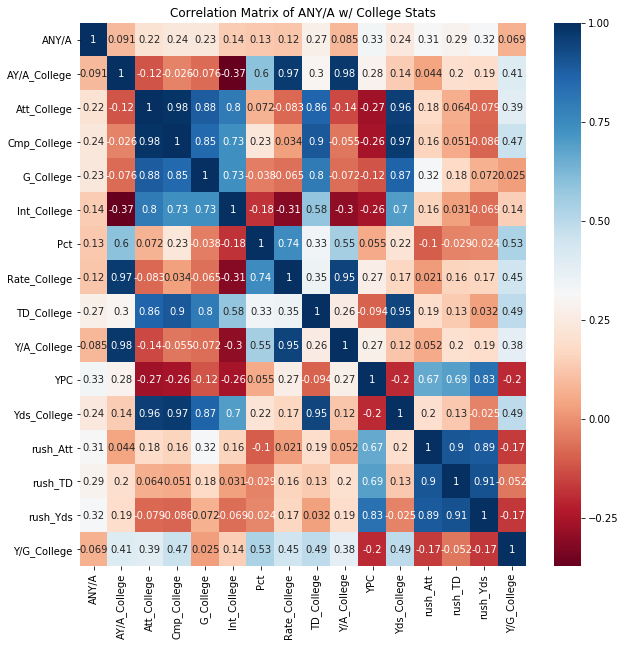

In [324]:
#ANY/A
anya_w_college = qbs[['ANY/A','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
anya_w_college_corr = anya_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(anya_w_college_corr, xticklabels=anya_w_college_corr.columns, yticklabels=anya_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of ANY/A w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of TD% w/ College Stats')

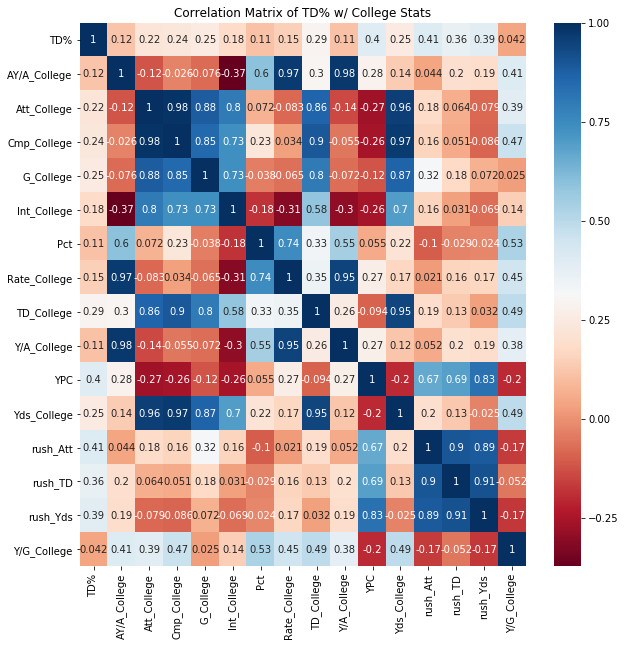

In [325]:
#TD%
td_w_college = qbs[['TD%','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
td_w_college_corr = td_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(td_w_college_corr, xticklabels=td_w_college_corr.columns, yticklabels=td_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of TD% w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of QBR w/ College Stats')

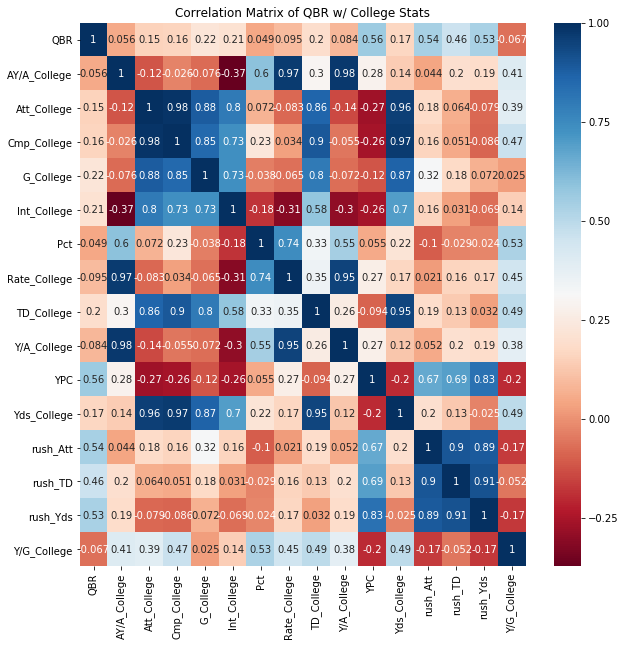

In [326]:
#QBR
qbr_w_college = qbs[['QBR','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
qbr_w_college_corr = qbr_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(qbr_w_college_corr, xticklabels=qbr_w_college_corr.columns, yticklabels=qbr_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of QBR w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of NY/A w/ College Stats')

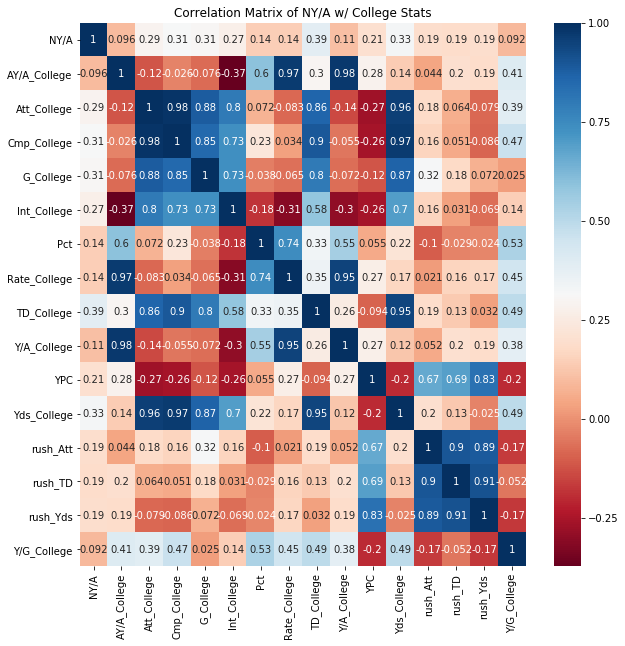

In [327]:
#NY/A
nya_w_college = qbs[['NY/A','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
nya_w_college_corr = nya_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(nya_w_college_corr, xticklabels=nya_w_college_corr.columns, yticklabels=nya_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of NY/A w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of YPA w/ College Stats')

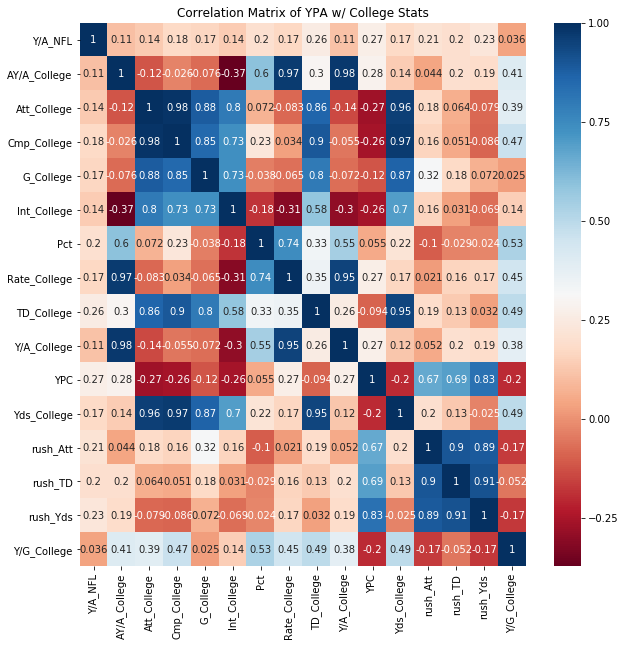

In [328]:
#YPA
ypa_w_college = qbs[['Y/A_NFL','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
ypa_w_college_corr = ypa_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(ypa_w_college_corr, xticklabels=ypa_w_college_corr.columns, yticklabels=ypa_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of YPA w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of Cmp% w/ College Stats')

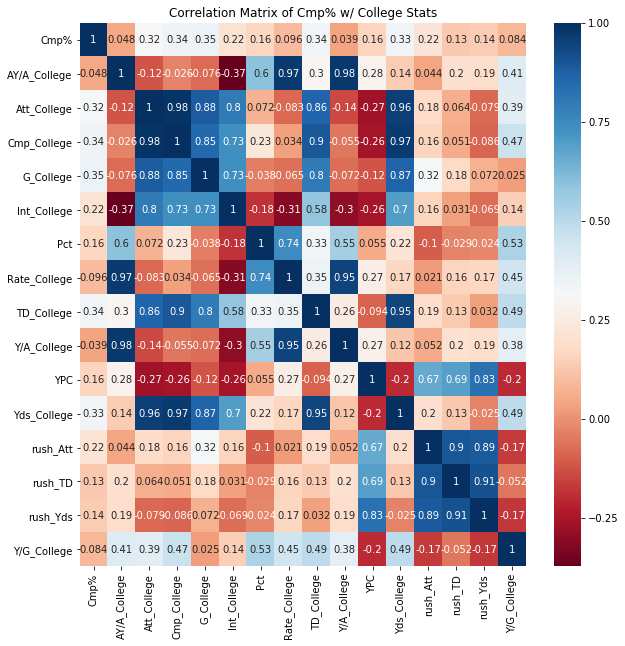

In [329]:
#Cmp%
cmp_w_college = qbs[['Cmp%','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
cmp_w_college_corr = cmp_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cmp_w_college_corr, xticklabels=cmp_w_college_corr.columns, yticklabels=cmp_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of Cmp% w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of Win Pct w/ College Stats')

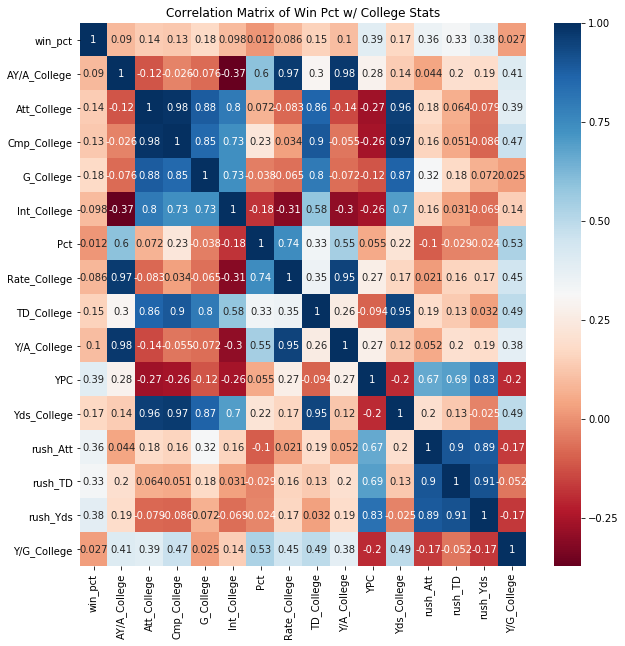

In [330]:
#Win Pct
win_w_college = qbs[['win_pct','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
win_w_college_corr = win_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(win_w_college_corr, xticklabels=win_w_college_corr.columns, yticklabels=win_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of Win Pct w/ College Stats')

### Observations
The heatmaps above provide some interesting insights into how the college data relates to our suspected targets.

Oddly, many of the pure passing statistics in the NFL have the strongest associations with college rushing statistics. This is expected for QBR, however, because QBR is calculated using rushing. This would be a QB with strong college rushing stats would get a QBR boost in the NFL if they continued to run at the pro level.

Another interesting takeaway is that the strongest associations seem to come from raw statistics vs the percentage and rate based metrics such as Pct, Rate_College, and Y/A_College.

However, the most consistency across all features occurred when related to YPA. We will use this as our target metric to build our model. To do this, the NFL average will be calculated then a categorical column will be made in our QB DataFrame that consists of QBs drafted between 2009-2019 that will denote whether or not that QB has an avg YPA above the NFL year average. 

# Calculate NFL Average YPA

In [331]:
#nfl qb statistics per season from 2009 to 2019, min 100 attempts
nfl_season.head()

,ANY/A,AY/A,Att,Cmp,Cmp%,Int,Int%,NY/A,QBR,Rate,...,TD%,Tm,Y/A,Y/G,Yds,G,Year,win_pct,cpoe,aDOT
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,7.47,8.7,541,350,64.7,7,1.3,6.98,70.7,103.2,...,5.5,GNB,8.2,277.1,4434,16,2009,0.687500,4.0,9.2
Marc Bulger,4.65,5.3,247,140,56.7,6,2.4,5.30,32.3,70.7,...,2.0,STL,5.9,163.2,1469,9,2009,0.125000,-4.7,7.7
Tom Brady,7.38,7.7,565,371,65.7,13,2.3,7.42,73.2,96.2,...,5.0,NWE,7.8,274.9,4398,16,2009,0.625000,3.5,8.3
Joe Flacco,6.12,7.0,499,315,63.1,12,2.4,6.35,59.8,88.9,...,4.2,BAL,7.2,225.8,3613,16,2009,0.562500,3.2,8.7
Drew Brees,8.31,8.9,514,363,70.6,11,2.1,7.96,83.4,109.6,...,6.6,NOR,8.5,292.5,4388,15,2009,0.866667,8.9,8.2


In [332]:
ypa_avg = round(nfl_season['Y/A'].mean(), 1)
print('The Average NFL YPA is ' + str(ypa_avg))

The Average NFL YPA is 7.1


In [333]:
ypa_w_college.columns

Index(['Y/A_NFL', 'AY/A_College', 'Att_College', 'Cmp_College', 'G_College',
       'Int_College', 'Pct', 'Rate_College', 'TD_College', 'Y/A_College',
       'YPC', 'Yds_College', 'rush_Att', 'rush_TD', 'rush_Yds', 'Y/G_College'],
      dtype='object')

Therefore, the goal of this project will now be to predict if a Quarterback's YPA in the NFL will be greater or less than the NFL Average YPA of 7.1 by initially using the following features:
1. AY/A_College (Adjusted Yards Per Attempt)
2. Att_College  (Total Attempts)
3. Cmp_College  (Total Completions)
4. G_College    (Total Games)
5. Int_College  (Total Int)
6. Pct          (Completion Percentage)
7. Rate_College (Passer Rating)
8. TD_College   (Total Passing Touchdowns)
9. Y/A_College  (Yards Per Attempt)
10. YPC         (Yards Per Carry)
11. Yds_College (Total Passing Yards)
12. rush_Att    (Total Rush Attempts)
13. rush_TD     (Total Rush Touchdowns)
14. rush_Yds    (Total Rush Yards)
15. Y/G_College (Passing Yards Per Game)

# Sort Data, Add Categorical Column

In [354]:
qbs = qbs[['Y/A_NFL', 'AY/A_College', 'Att_College', 'Cmp_College', 'G_College',
       'Int_College', 'Pct', 'Rate_College', 'TD_College', 'Y/A_College',
       'YPC', 'Yds_College', 'rush_Att', 'rush_TD', 'rush_Yds','Y/G_College']].sort_values(by='Y/A_NFL', ascending=False)
qbs.to_csv('qbs-eda.csv')

In [355]:
above_nfl_ypa = [1 if ypa >=ypa_avg else 0 for ypa in qbs['Y/A_NFL']]

qbs['above_nfl_ypa'] = above_nfl_ypa

qbs

,Y/A_NFL,AY/A_College,Att_College,Cmp_College,G_College,Int_College,Pct,Rate_College,TD_College,Y/A_College,YPC,Yds_College,rush_Att,rush_TD,rush_Yds,Y/G_College,above_nfl_ypa
Player,,,,,,,,,,,,,,,,,
Patrick Mahomes,8.6,8.7,1164,752,25,25,64.6,152.1,77,8.3,2.8,9705,262,22,741,388.200000,1
Nick Mullens,8.3,7.2,1546,928,44,46,59.0,134.0,87,7.6,-1.2,11994,183,9,-210,272.590909,1
Deshaun Watson,8.1,8.3,1070,721,30,30,67.4,153.7,76,8.2,4.6,8702,372,21,1734,290.066667,1
Russell Wilson,7.9,8.9,1214,757,39,29,63.5,155.7,92,8.4,3.3,9765,325,19,1033,250.384615,1
Jameis Winston,7.8,9.6,851,562,27,28,66.1,165.2,65,9.5,1.8,7964,145,7,284,294.962963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
David Blough,5.7,6.2,1272,769,35,39,60.3,125.0,60,6.6,0.8,8631,222,11,159,246.600000,0
Josh Rosen,5.5,8.0,939,575,24,21,61.3,140.6,49,7.9,-0.8,7425,87,4,-82,309.375000,0
Bryce Petty,5.5,10.6,831,520,25,10,62.6,166.0,61,9.7,1.7,8055,178,20,310,322.200000,0


### Observations
There were 63 NLF QBs between 2009-2019 that had more than 100 passing attempts in College between that same time frame.\
Many Recognizable Names are have higher NFL YPAs which is a good indicator that YPA makes sense as our target. \

# Univariate Analysis of Features

In [356]:
#Summary Statistics
qbs.describe()

,Y/A_NFL,AY/A_College,Att_College,Cmp_College,G_College,Int_College,Pct,Rate_College,TD_College,Y/A_College,YPC,Yds_College,rush_Att,rush_TD,rush_Yds,Y/G_College,above_nfl_ypa
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,6.831746,8.390476,927.746032,590.206349,29.158730,20.492063,63.338095,148.201587,59.444444,8.107937,1.731746,7497.555556,197.730159,10.904762,565.809524,256.703572,0.365079
std,0.717483,1.401924,357.029906,234.085741,9.733889,9.542558,4.232571,16.443231,26.909513,1.028199,2.869181,2943.152944,119.099742,10.051022,845.562856,52.766689,0.485320
min,4.400000,5.700000,280.000000,160.000000,10.000000,4.000000,55.100000,116.000000,17.000000,6.300000,-5.000000,2044.000000,34.000000,0.000000,-425.000000,157.638889,0.000000
25%,6.500000,7.400000,655.500000,397.000000,25.000000,14.000000,60.400000,134.800000,39.000000,7.400000,-0.550000,5069.500000,108.500000,4.000000,-52.500000,214.682692,0.000000
50%,6.900000,8.200000,917.000000,564.000000,27.000000,21.000000,63.500000,147.400000,54.000000,7.900000,1.800000,7229.000000,174.000000,7.000000,310.000000,250.384615,0.000000
75%,7.300000,9.400000,1190.500000,766.500000,38.000000,25.000000,66.950000,158.050000,75.500000,8.800000,3.450000,9791.000000,258.500000,14.000000,931.500000,293.032764,1.000000
max,8.600000,13.000000,1616.000000,1077.000000,50.000000,48.000000,70.600000,199.200000,119.000000,11.600000,7.200000,12765.000000,655.000000,50.000000,4132.000000,403.642857,1.000000


In [357]:
qbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, Patrick Mahomes to Ryan Lindley
Data columns (total 17 columns):
Y/A_NFL          63 non-null float64
AY/A_College     63 non-null float64
Att_College      63 non-null int64
Cmp_College      63 non-null int64
G_College        63 non-null int64
Int_College      63 non-null int64
Pct              63 non-null float64
Rate_College     63 non-null float64
TD_College       63 non-null int64
Y/A_College      63 non-null float64
YPC              63 non-null float64
Yds_College      63 non-null int64
rush_Att         63 non-null int64
rush_TD          63 non-null int64
rush_Yds         63 non-null int64
Y/G_College      63 non-null float64
above_nfl_ypa    63 non-null int64
dtypes: float64(7), int64(10)
memory usage: 8.9+ KB


### Observations
We are not missing any values. There are 63 rows with 16 columns/features. Two of these columns the targer, so we really have 14 features.\
The min NFL YPA is 4.4 and the max is 8.6 with a standard deviation of 0.717.

A significant observations made here is that we have 14 features and 63 observations/rows. The typical rule of thumb is to have at least 10-20 observations per feature. We will now do some further analysis to explore each variable and look for multicollinearity amongst them. This might get us to a higher observation : feature ratio.

In [338]:
#target value counts
qbs['above_nfl_ypa'].value_counts()

0    40
1    23
Name: above_nfl_ypa, dtype: int64

Of the 63 Quarterbacks, 40 have an NFL YPA less than the 7.1 NFL Avg and 23 have a greater than 7.1 NFL Avg.

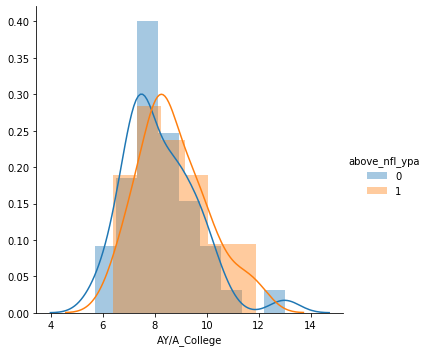

In [339]:
#dist plots
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'AY/A_College').add_legend()

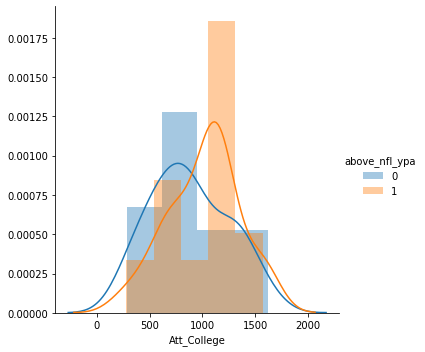

In [340]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Att_College').add_legend()

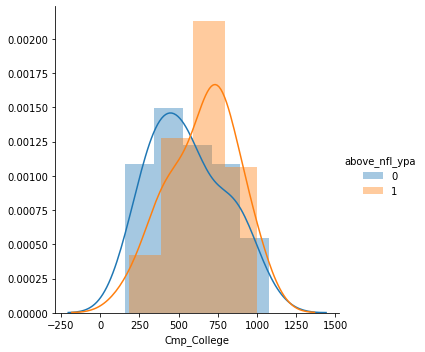

In [341]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Cmp_College').add_legend()

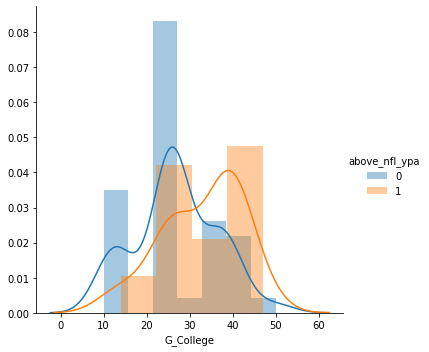

In [342]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'G_College').add_legend()

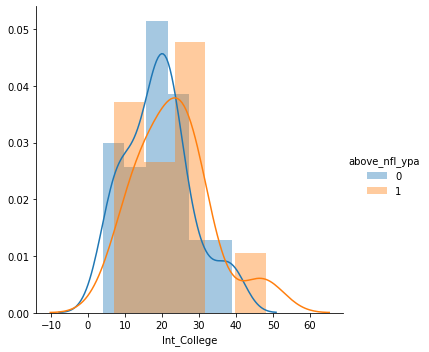

In [343]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Int_College').add_legend()

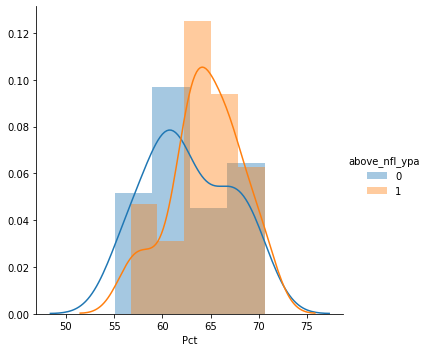

In [344]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Pct').add_legend()

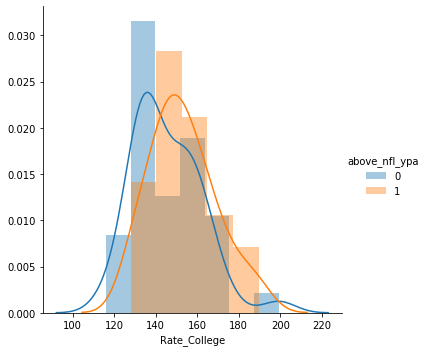

In [345]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Rate_College').add_legend()

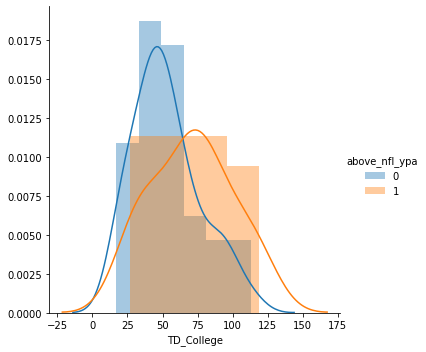

In [346]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'TD_College').add_legend()

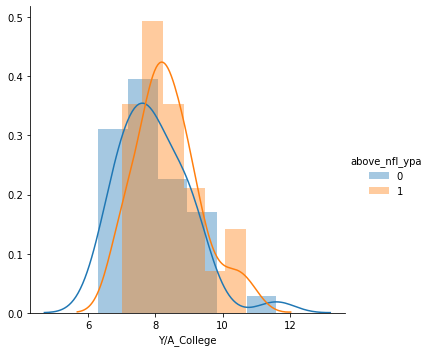

In [347]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Y/A_College').add_legend()

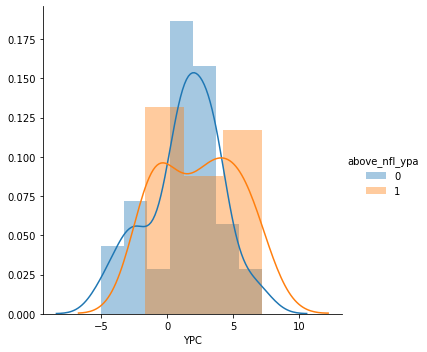

In [348]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'YPC').add_legend()

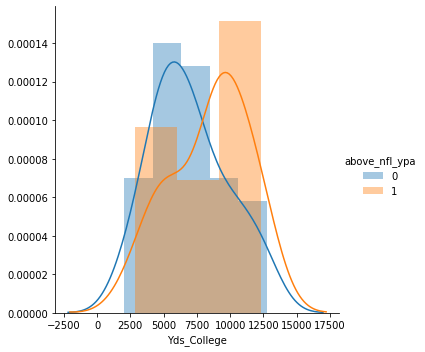

In [349]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Yds_College').add_legend()

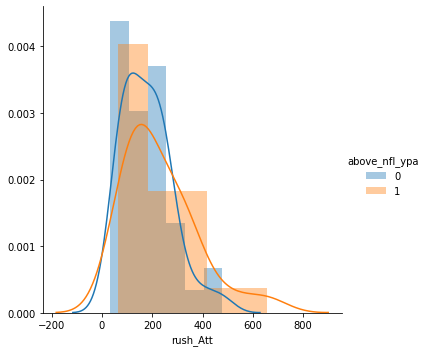

In [350]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'rush_Att').add_legend()

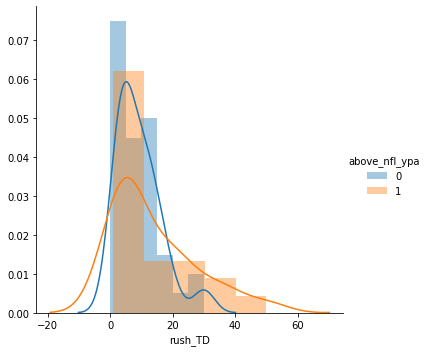

In [351]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'rush_TD').add_legend()

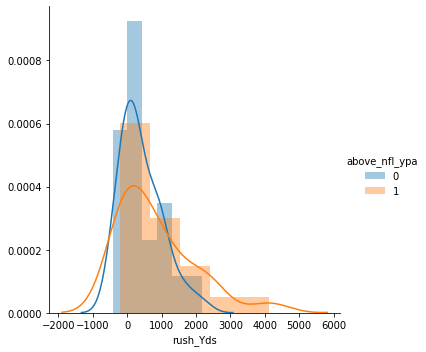

In [352]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'rush_Yds').add_legend()

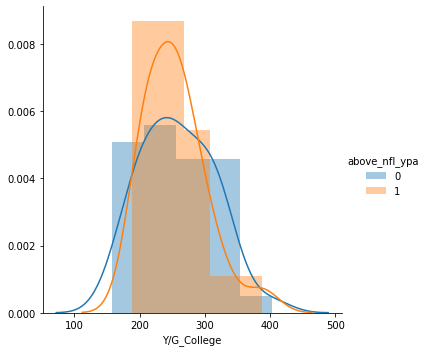

In [353]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Y/G_College').add_legend()

Text(0.5, 1.0, 'AY/A')

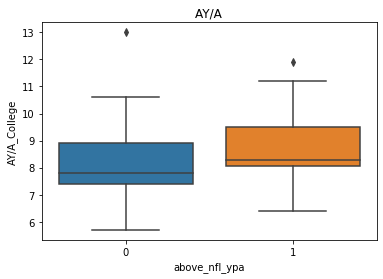

In [276]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'AY/A_College', data=qbs)
plt.title('AY/A')

Text(0.5, 1.0, 'Attempts')

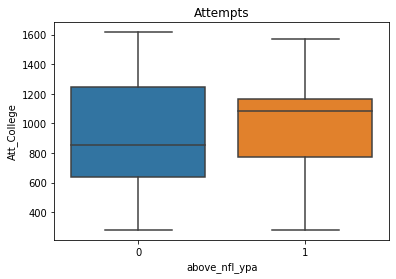

In [277]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Att_College', data=qbs)
plt.title('Attempts')

Text(0.5, 1.0, 'Completions')

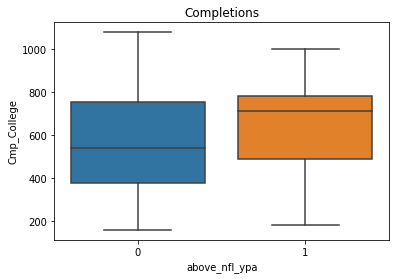

In [278]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Cmp_College', data=qbs)
plt.title('Completions')

Text(0.5, 1.0, 'Games')

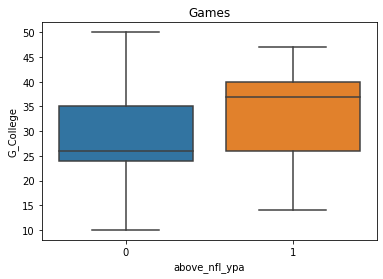

In [279]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'G_College', data=qbs)
plt.title('Games')

Text(0.5, 1.0, 'Interceptions')

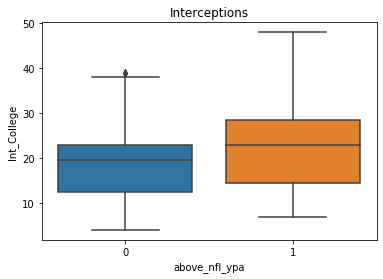

In [280]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Int_College', data=qbs)
plt.title('Interceptions')

Text(0.5, 1.0, 'Completion Percentage')

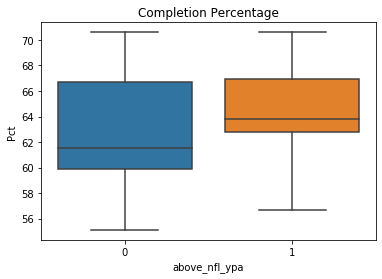

In [281]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Pct', data=qbs)
plt.title('Completion Percentage')

Text(0.5, 1.0, 'Passer Rating')

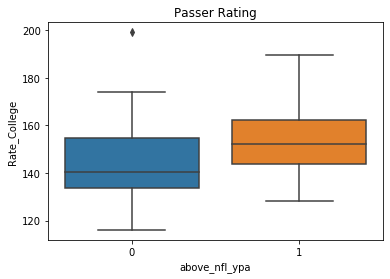

In [282]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Rate_College', data=qbs)
plt.title('Passer Rating')

Text(0.5, 1.0, 'Passing Touchdowns')

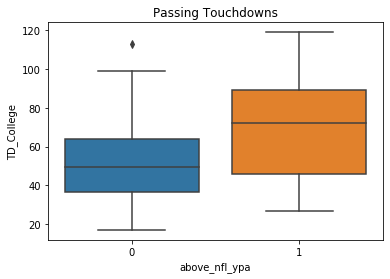

In [283]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'TD_College', data=qbs)
plt.title('Passing Touchdowns')

Text(0.5, 1.0, 'YPA')

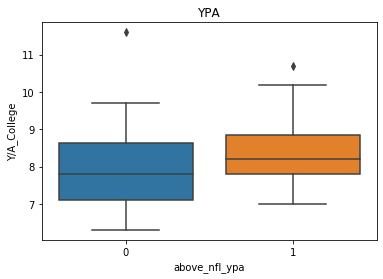

In [284]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Y/A_College', data=qbs)
plt.title('YPA')

Text(0.5, 1.0, 'YPC')

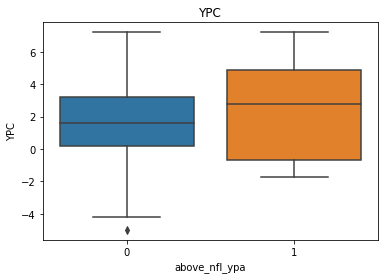

In [285]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'YPC', data=qbs)
plt.title('YPC')

Text(0.5, 1.0, 'Passing Yards')

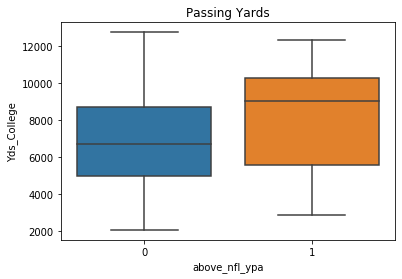

In [286]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Yds_College', data=qbs)
plt.title('Passing Yards')

Text(0.5, 1.0, 'Rushing Attempts')

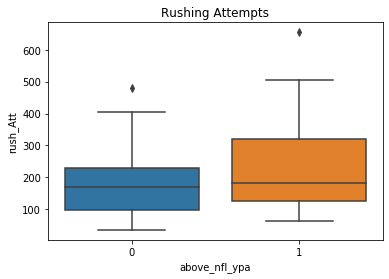

In [287]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'rush_Att', data=qbs)
plt.title('Rushing Attempts')

Text(0.5, 1.0, 'Rushing Touchdowns')

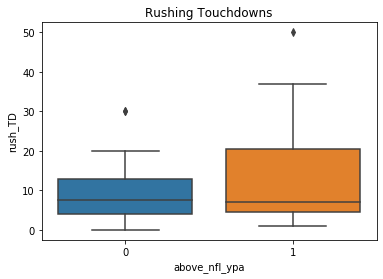

In [288]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'rush_TD', data=qbs)
plt.title('Rushing Touchdowns')

Text(0.5, 1.0, 'Rushing Yards')

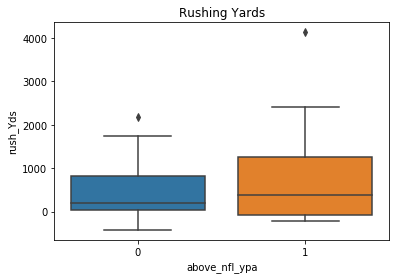

In [289]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'rush_Yds', data=qbs)
plt.title('Rushing Yards')

Text(0.5, 1.0, 'Passing Yards Per Game')

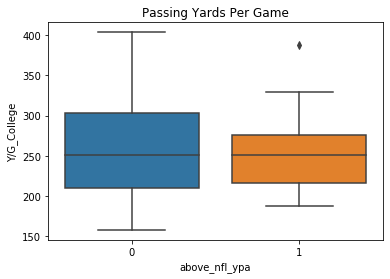

In [358]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Y/G_College', data=qbs)
plt.title('Passing Yards Per Game')

In [359]:
qbs[(qbs['Rate_College'] > 180) & (qbs['above_nfl_ypa'] == 0)]

,Y/A_NFL,AY/A_College,Att_College,Cmp_College,G_College,Int_College,Pct,Rate_College,TD_College,Y/A_College,YPC,Yds_College,rush_Att,rush_TD,rush_Yds,Y/G_College,above_nfl_ypa
Player,,,,,,,,,,,,,,,,,
Kyler Murray,6.9,13.0,377,260,14,7,69.0,199.2,42,11.6,7.2,4361,140,12,1001,311.5,0


### Observations
If you notice in the AY/A and Passer Rating box plots, the highest QB in those two statistics was beloe the NFL Avg YPA. When examining this closer this is Kyler Murray. Whose NFL YPA after one season is 6.9. This is close to the NFL 10 year average. In the offense he plays in, he throws a lot of short passes. This could be a reason why he has a lower than average YPA. 

There are other outliers present and we will keep these in there for now. The explanation for these outliers will be investigated. For instance, Kyler Murray's aDOT(Average Depth Of Targe) could be why he has a lower YPA. Other explanations for "unsuccessful" quarterbacks could be going to badly run organization with a history of losing.


When looking at the box plots of each feature, there are many that have a higher mean for QBs above the NFL YPA Average. This is apparent in AY/A, Attempts, Completions, Games, Completion Percentage, Passer Rating, Passing Touchdowns, YPA and Passing Yards. The same can not be said for rushing statistics. These may need to be dropped. 

## Multicollinearity


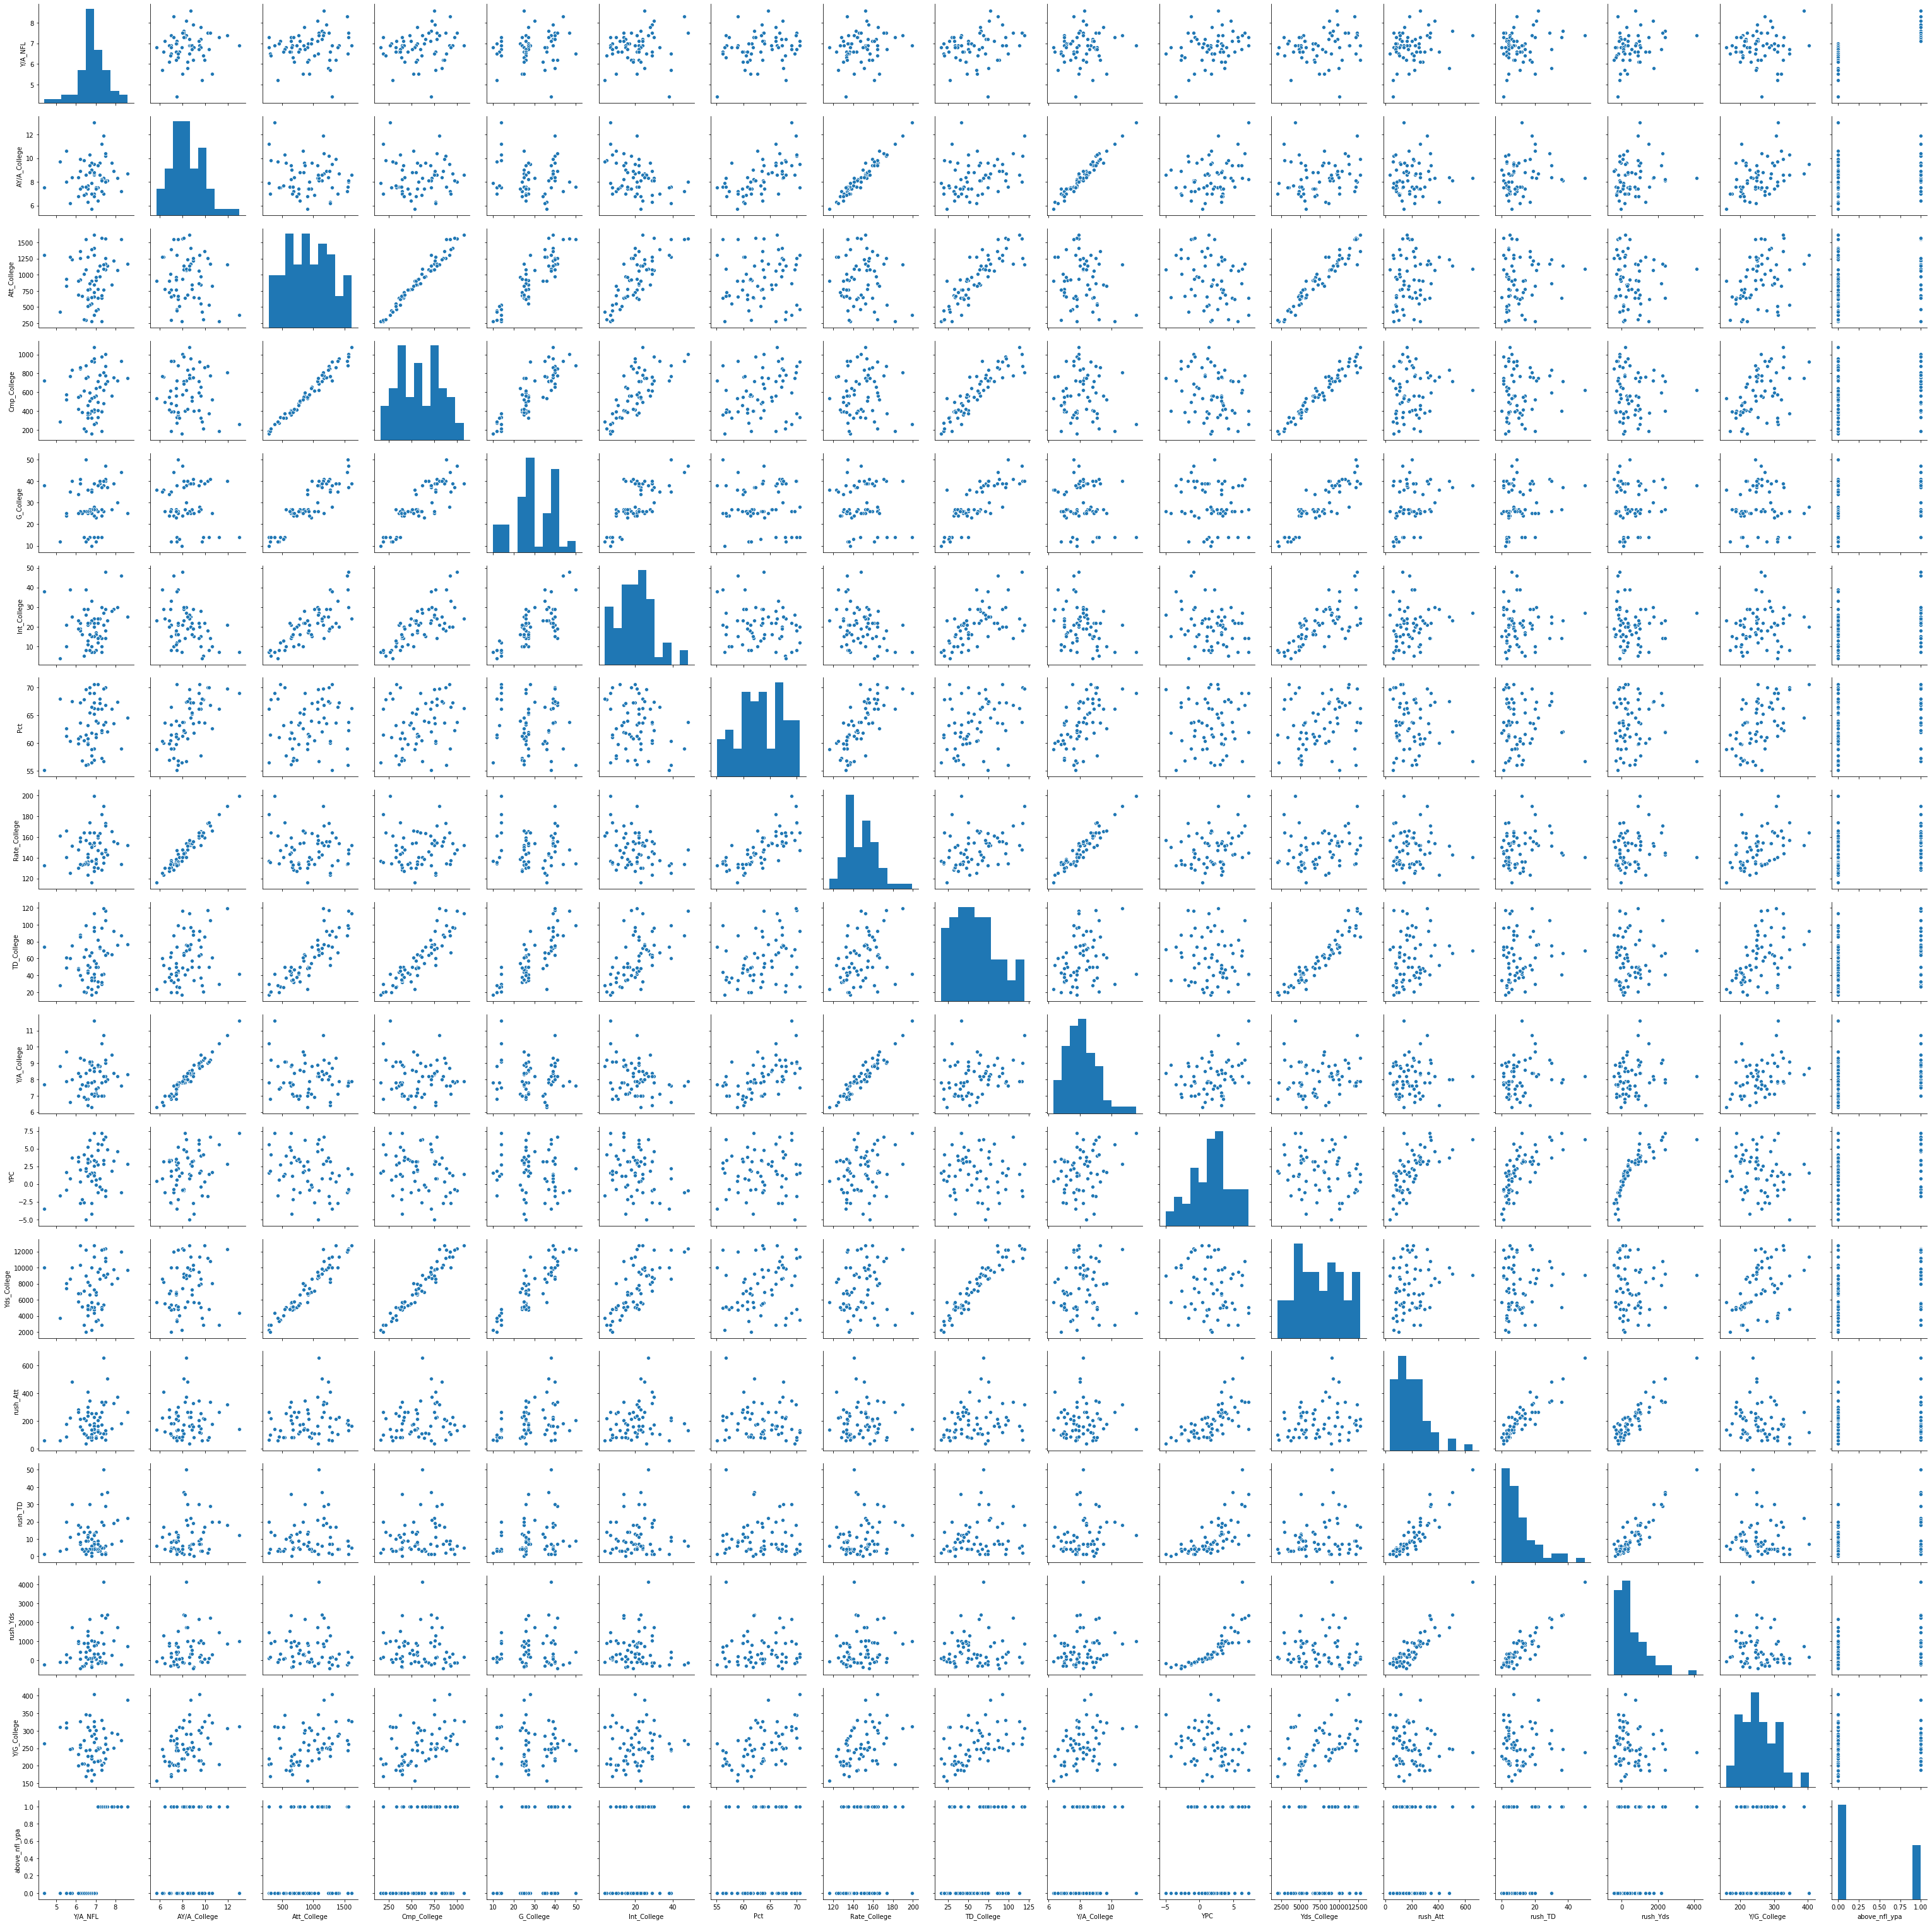

In [363]:
sns.pairplot(qbs)

### Observations

When you examine the pairplot above, you can see that there are some features that correlate strongly to each other. This means there is some multicollinearity amongst our features and some will need to be dropped.

In [365]:
#Calculate VIF(Variance Inflation Factor) of the features. Drop some columns.
#Then the VIF will be calcualted again to see the difference.

#Add Constant Method
X1 = sm.tools.add_constant(qbs)

#Create Pandas Series
qbs_1 = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

qbs_1

const            3435.410923
Y/A_NFL             2.874582
AY/A_College      377.601929
Att_College       484.602846
Cmp_College       427.412691
G_College          48.587681
Int_College        23.749163
Pct                44.636645
Rate_College      431.187888
TD_College         73.770977
Y/A_College       164.132754
YPC                 4.606129
Yds_College       262.327170
rush_Att           10.932450
rush_TD            10.161078
rush_Yds           15.645655
Y/G_College        17.391122
above_nfl_ypa       3.080464
dtype: float64

In [366]:
#drop rushing, att, cmp, tds
qbs_new = qbs.drop(['Y/A_NFL','AY/A_College','Att_College','Int_College','Y/A_College','YPC','rush_Att','rush_TD','rush_Yds','Cmp_College','TD_College','G_College'], axis=1)

In [371]:
X2 = sm.tools.add_constant(qbs_new)
qbs_2 = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)
qbs_2

const            261.914987
Pct                2.557802
Rate_College       2.324941
Yds_College        1.512178
Y/G_College        1.999739
above_nfl_ypa      1.253828
dtype: float64

In [373]:
qbs_model = qbs[['above_nfl_ypa','Pct','Rate_College','Yds_College','Y/G_College']]
qbs_model.head()

,above_nfl_ypa,Pct,Rate_College,Yds_College,Y/G_College
Player,,,,,
Patrick Mahomes,1,64.6,152.1,9705,388.200000
Nick Mullens,1,59.0,134.0,11994,272.590909
Deshaun Watson,1,67.4,153.7,8702,290.066667
Russell Wilson,1,63.5,155.7,9765,250.384615
Jameis Winston,1,66.1,165.2,7964,294.962963


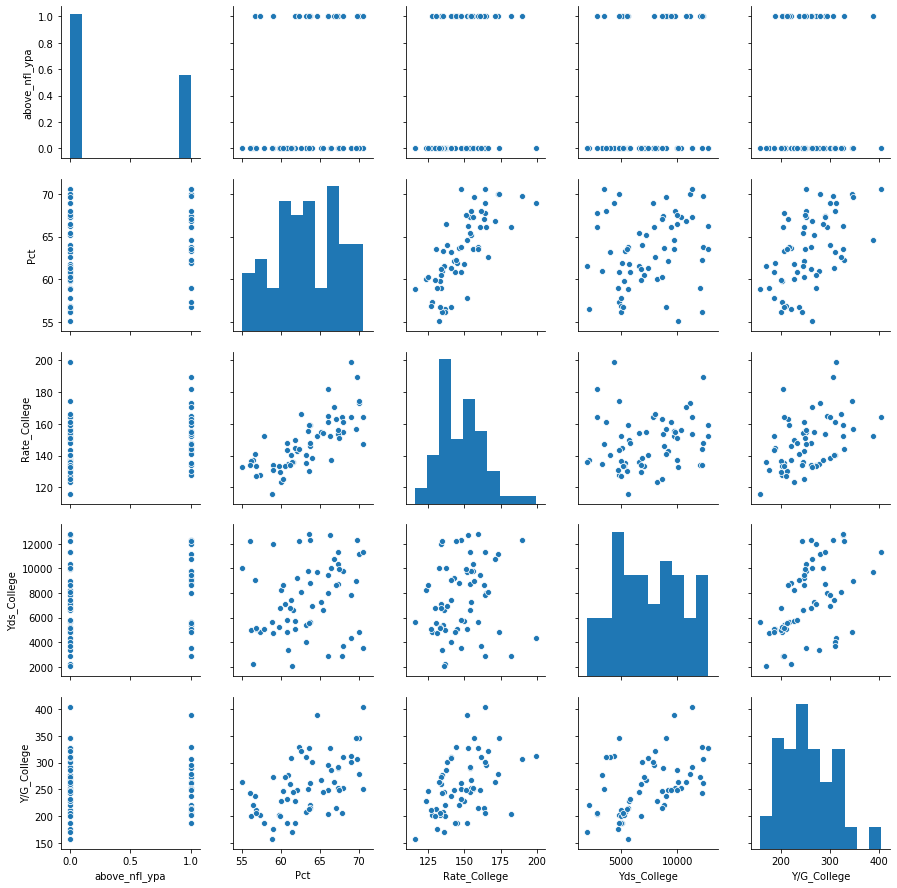

In [374]:
#Pairplot of resulting data
sns.pairplot(qbs_model)

# Conclusions

We explored various NFL Passing Data related to QB Win Pct and determined 8 significant metrics that included:

1. Passer Rating - corr = 0.73
2. AY/A - corr = 0.72
3. ANY/A - corr = 0.72
4. TD% - corr = 0.69
5. QBR - corr = 0.67
6. NY/A - corr = 0.64
7. YPA - corr = 0.64
8. Cmp% - corr = 0.6

Even though YPA had the 7th highest correlation, when correlation matrices were calculated with the College Statistics, YPA had the strongest association with 15 College Statistics. 

The Average NFL YPA was then determined to be 7.1 between 2009 and 2019. The features were then analyzed univariately and bivariately. Multicollinearity was examined and several features were dropped. We were left with 4 features. Getting down to 4 helps to satisfy the 10-20 observations / exploratory variable. The resulting DataFrame for modeling will carry the following columns:

1. above_nfl_ypa
2. Pct
3. Rate_College
4. Yds_College
5. Y/G_College